In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")
plt.rcParams["figure.dpi"] = 120


In [2]:
df = pd.read_csv("prompt_trajectories_v2.csv")
summary = pd.read_csv("session_summary_v2.csv")

df.head(), summary.head()


(           conversation_id  timestep        prompt_intent  meta_cognitive  \
 0  legislation_corporate_1         0                other           False   
 1  legislation_corporate_1         1  delegation_generate           False   
 2  legislation_corporate_1         2  delegation_generate           False   
 3  legislation_corporate_1         3  delegation_generate           False   
 4  legislation_corporate_1         4   explain_or_clarify           False   
 
    hedging  certainty  authority_transfer  refinement  prompt_length  \
 0    False      False               False       False              9   
 1    False      False               False       False             30   
 2    False      False               False       False              5   
 3    False      False               False       False             18   
 4    False      False               False       False             10   
 
    num_constraints  descriptive_words    t_norm  
 0                0                  0 

In [3]:
print("Number of sessions:", df["conversation_id"].nunique())
print("Total prompts:", len(df))
print("\nIntent distribution:")
df["prompt_intent"].value_counts()


Number of sessions: 12
Total prompts: 96

Intent distribution:


prompt_intent
other                  64
delegation_generate    15
explain_or_clarify     12
delegation_modify       2
idea_generation         2
critique                1
Name: count, dtype: int64

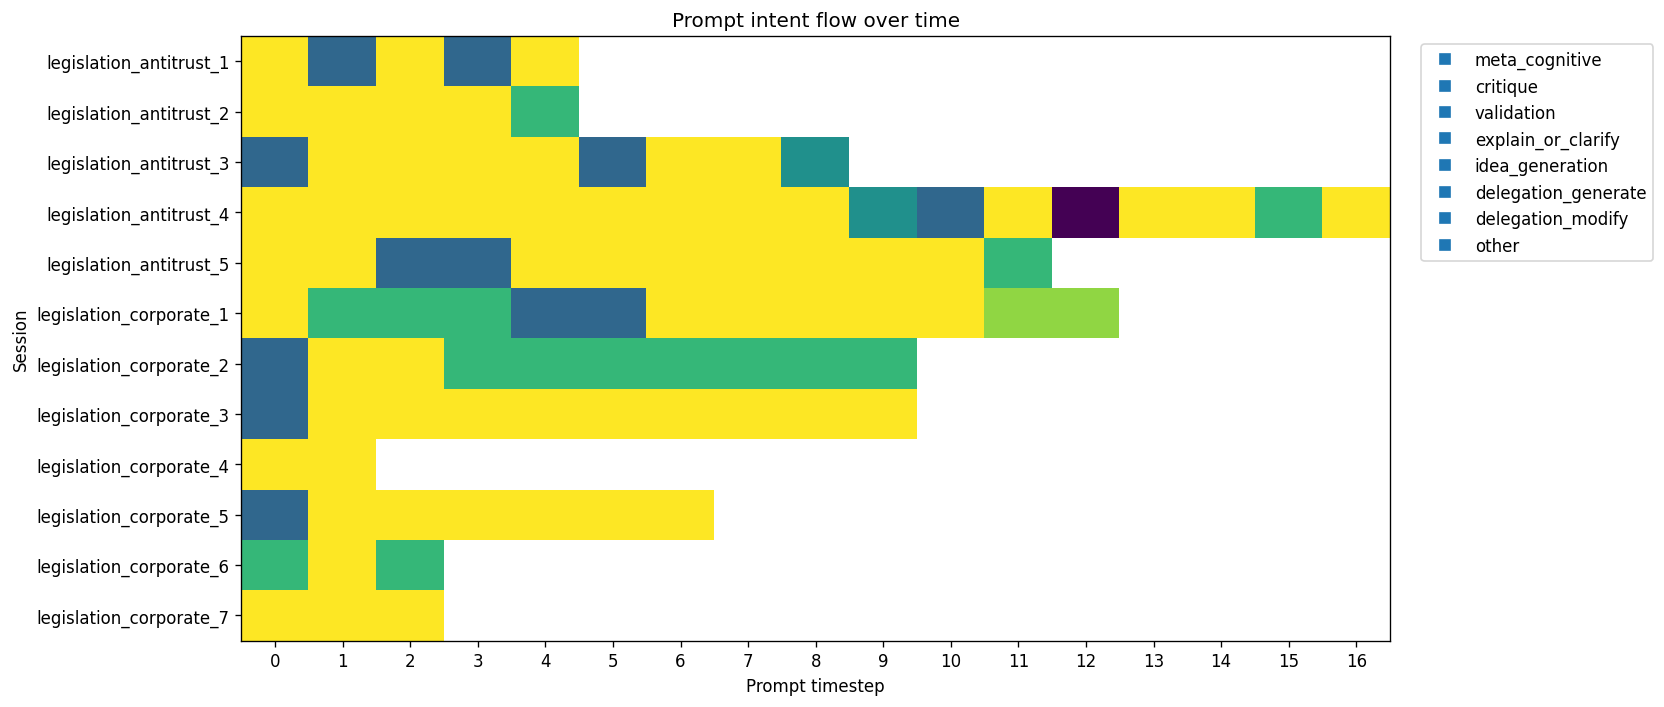

In [4]:
intent_order = [
    "meta_cognitive",
    "critique",
    "validation",
    "explain_or_clarify",
    "idea_generation",
    "delegation_generate",
    "delegation_modify",
    "other"
]

intent_to_code = {k: i for i, k in enumerate(intent_order)}

sessions = sorted(df["conversation_id"].unique())
max_len = df["timestep"].max() + 1

mat = np.full((len(sessions), max_len), np.nan)

for r, sid in enumerate(sessions):
    sub = df[df["conversation_id"] == sid].sort_values("timestep")
    for _, row in sub.iterrows():
        mat[r, int(row["timestep"])] = intent_to_code[row["prompt_intent"]]

plt.figure(figsize=(14, 6))
plt.imshow(mat, aspect="auto")
plt.yticks(range(len(sessions)), sessions)
plt.xticks(range(max_len))
plt.xlabel("Prompt timestep")
plt.ylabel("Session")
plt.title("Prompt intent flow over time")

# Legend
handles = [
    plt.Line2D([0], [0], marker='s', linestyle='', label=k)
    for k in intent_order
]
plt.legend(handles=handles, bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()


In [5]:
df["t_bin"] = pd.cut(
    df["t_norm"],
    bins=np.linspace(0, 1, 11),
    include_lowest=True,
    labels=False
)


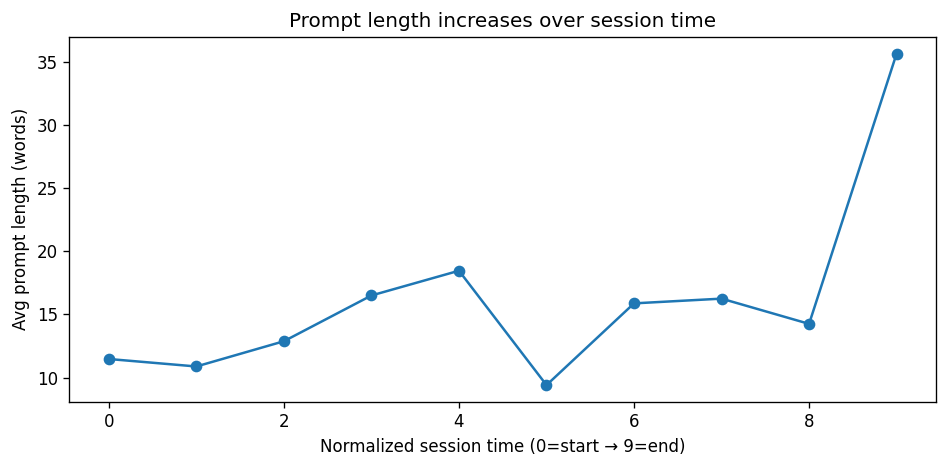

In [6]:
length_by_bin = df.groupby("t_bin")["prompt_length"].mean()

plt.figure(figsize=(8, 4))
plt.plot(length_by_bin.index, length_by_bin.values, marker="o")
plt.xlabel("Normalized session time (0=start → 9=end)")
plt.ylabel("Avg prompt length (words)")
plt.title("Prompt length increases over session time")
plt.tight_layout()
plt.show()


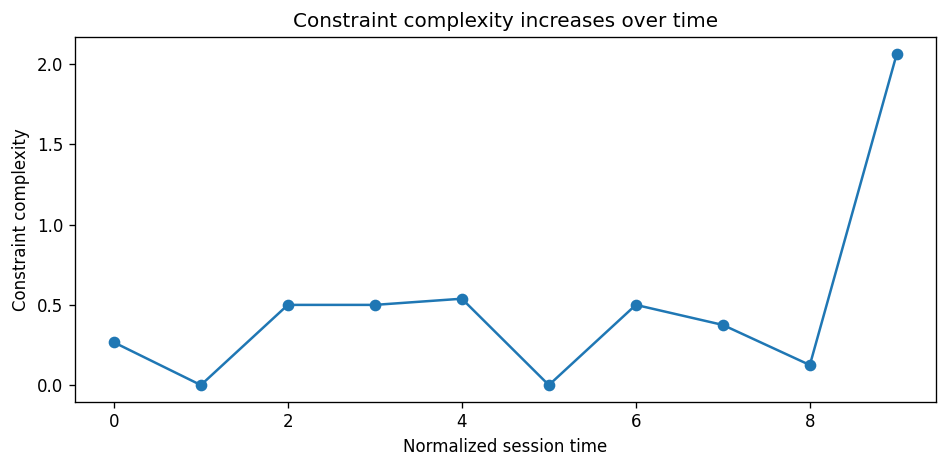

In [7]:
constraints_by_bin = df.groupby("t_bin")["num_constraints"].mean()

plt.figure(figsize=(8, 4))
plt.plot(constraints_by_bin.index, constraints_by_bin.values, marker="o")
plt.xlabel("Normalized session time")
plt.ylabel("Constraint complexity")
plt.title("Constraint complexity increases over time")
plt.tight_layout()
plt.show()


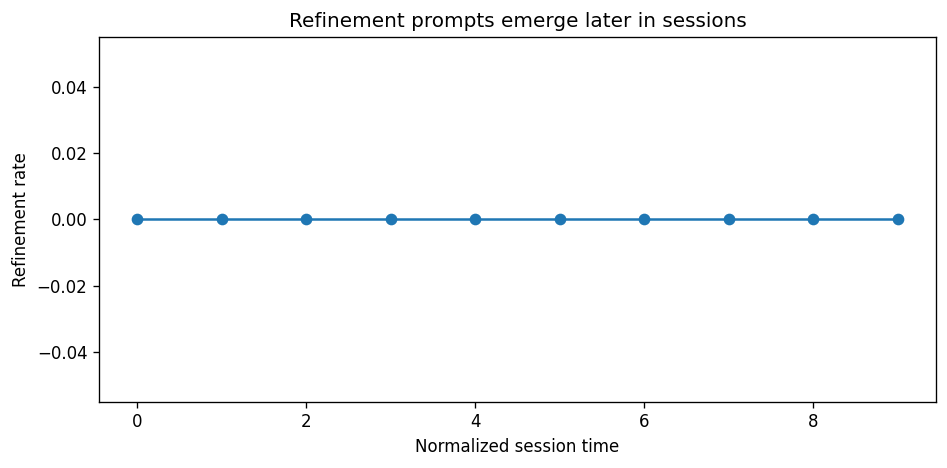

In [8]:
refine_by_bin = df.groupby("t_bin")["refinement"].mean()

plt.figure(figsize=(8, 4))
plt.plot(refine_by_bin.index, refine_by_bin.values, marker="o")
plt.xlabel("Normalized session time")
plt.ylabel("Refinement rate")
plt.title("Refinement prompts emerge later in sessions")
plt.tight_layout()
plt.show()


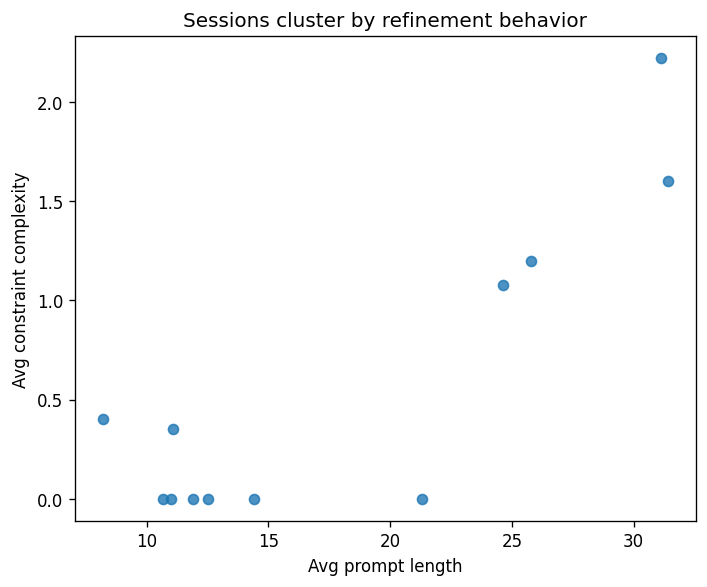

In [9]:
plt.figure(figsize=(6, 5))
plt.scatter(
    summary["avg_prompt_length"],
    summary["avg_constraints"],
    alpha=0.8
)

plt.xlabel("Avg prompt length")
plt.ylabel("Avg constraint complexity")
plt.title("Sessions cluster by refinement behavior")
plt.tight_layout()
plt.show()


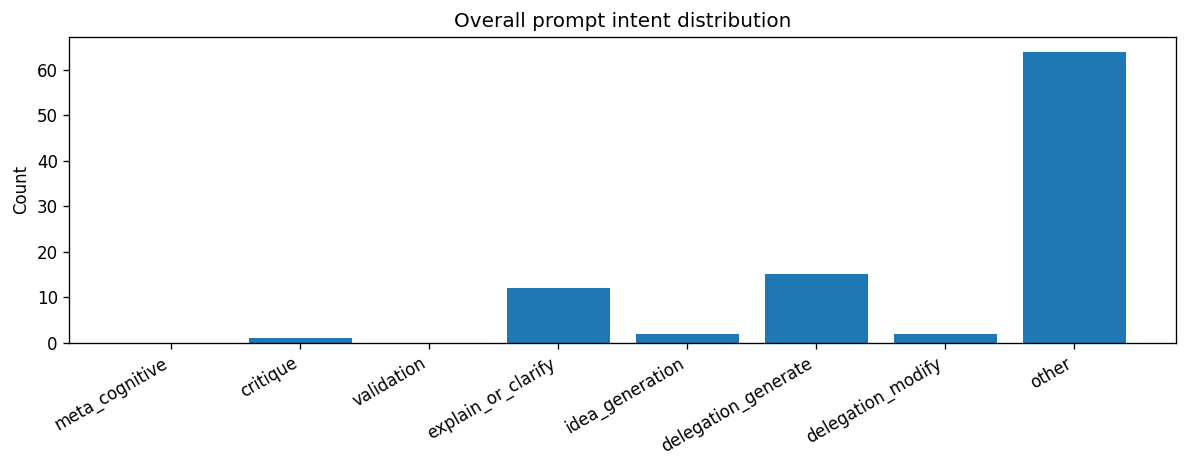

In [10]:
intent_counts = df["prompt_intent"].value_counts().reindex(intent_order, fill_value=0)

plt.figure(figsize=(10, 4))
plt.bar(intent_counts.index, intent_counts.values)
plt.xticks(rotation=30, ha="right")
plt.ylabel("Count")
plt.title("Overall prompt intent distribution")
plt.tight_layout()
plt.show()
